# Projet Machine Learning : Prediction des Prix Immobiliers

**Master Mathematiques Appliquees, Statistique - M2 Data Science**  
**Aix-Marseille Universite 2025-2026**

---

## Table des matieres

1. Introduction et objectifs
2. Chargement et exploration des donnees
3. Preprocessing et nettoyage
4. Entrainement des modeles
5. Evaluation et comparaison
6. Analyse des resultats
7. Conclusion

---
## 1. Introduction et objectifs

### Contexte

Ce projet vise a predire les prix de maisons a partir de leurs caracteristiques (surface, nombre de chambres, equipements, etc.). Il s'agit d'un probleme de **regression supervisee**.

### Objectifs

- Nettoyer et preparer les donnees brutes
- Comparer plusieurs algorithmes de regression
- Identifier le meilleur modele selon les metriques standard
- Analyser les risques de surapprentissage

### Methodologie

Le pipeline suit les etapes classiques :

1. **Data Processing** : Nettoyage, standardisation des noms, gestion des valeurs manquantes
2. **Feature Engineering** : Encodage des variables categorielles
3. **Model Training** : Entrainement de 4 modeles differents
4. **Evaluation** : Comparaison sur un ensemble de test independant

---
## 2. Chargement et exploration des donnees

### 2.1 Donnees brutes

Le jeu de donnees initial contient 809 observations et 14 variables.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Configuration
plt.style.use('seaborn-v0_8-whitegrid')
pd.set_option('display.float_format', lambda x: '{:,.2f}'.format(x))

# Chemins
BASE_DIR = Path(".")
DATA_DIR = BASE_DIR / "data"
RESULTS_DIR = BASE_DIR / "results"
FIGURES_DIR = BASE_DIR / "figures"

In [2]:
# Informations sur les donnees brutes
raw_data_info = {
    "Fichier source": "house_prices.csv",
    "Nombre d'observations": 809,
    "Nombre de variables": 14,
    "Taille memoire": "0.33 MB",
    "Variables numeriques": 7,
    "Variables categorielles": 7,
    "Lignes dupliquees": 0
}

print("INFORMATIONS SUR LE JEU DE DONNEES BRUT")
print("=" * 50)
for key, value in raw_data_info.items():
    print(f"{key:30} : {value}")

INFORMATIONS SUR LE JEU DE DONNEES BRUT
Fichier source                 : house_prices.csv
Nombre d'observations          : 809
Nombre de variables            : 14
Taille memoire                 : 0.33 MB
Variables numeriques           : 7
Variables categorielles        : 7
Lignes dupliquees              : 0


In [3]:
# Variables du dataset
variables = [
    ("price", "Variable cible - Prix de la maison"),
    ("area", "Surface habitable en pieds carres"),
    ("bedrooms", "Nombre de chambres"),
    ("bathrooms", "Nombre de salles de bain"),
    ("stories", "Nombre d'etages"),
    ("mainroad", "Acces a la route principale (oui/non)"),
    ("guestroom", "Chambre d'amis (oui/non)"),
    ("basement", "Sous-sol (oui/non)"),
    ("hot_water_heating", "Chauffage eau chaude (oui/non)"),
    ("airconditioning", "Climatisation (oui/non)"),
    ("parking", "Nombre de places de parking"),
    ("prefarea", "Zone preferentielle (oui/non)"),
    ("furnishing_status", "Statut d'ameublement (meuble/semi/non)"),
    ("house_age", "Age de la maison (supprime - 99.4% manquant)")
]

print("\nDESCRIPTION DES VARIABLES")
print("=" * 70)
for var, desc in variables:
    print(f"{var:25} : {desc}")


DESCRIPTION DES VARIABLES
price                     : Variable cible - Prix de la maison
area                      : Surface habitable en pieds carres
bedrooms                  : Nombre de chambres
bathrooms                 : Nombre de salles de bain
stories                   : Nombre d'etages
mainroad                  : Acces a la route principale (oui/non)
guestroom                 : Chambre d'amis (oui/non)
basement                  : Sous-sol (oui/non)
hot_water_heating         : Chauffage eau chaude (oui/non)
airconditioning           : Climatisation (oui/non)
parking                   : Nombre de places de parking
prefarea                  : Zone preferentielle (oui/non)
furnishing_status         : Statut d'ameublement (meuble/semi/non)
house_age                 : Age de la maison (supprime - 99.4% manquant)


### 2.2 Problemes de qualite identifies

L'analyse initiale a revele plusieurs problemes :

| Probleme | Detail |
|----------|--------|
| Valeurs manquantes | Variable `house_age` avec 99.4% de valeurs manquantes |
| Noms de colonnes | Inconsistance (majuscules, espaces) |
| Variable cible | 20 valeurs manquantes dans `price` |
| Valeurs manquantes binaires | 14-21 valeurs manquantes par colonne binaire |

---
## 3. Preprocessing et nettoyage

### 3.1 Operations de nettoyage effectuees

In [4]:
# Resume des operations de nettoyage
cleaning_operations = [
    ("Standardisation des noms de colonnes", "snake_case applique a toutes les colonnes"),
    ("Suppression valeurs cibles manquantes", "20 lignes supprimees (price = NaN)"),
    ("Nettoyage furnishing_status", "4 categories : furnished, unfurnished, semi-furnished, unknown"),
    ("Encodage colonnes binaires", "6 colonnes converties en 0/1"),
    ("Suppression colonne house_age", "Plus de 95% de valeurs manquantes"),
    ("Imputation valeurs manquantes", "Mode pour categoriel, mediane pour numerique"),
    ("Suppression doublons", "51 lignes dupliquees supprimees")
]

print("OPERATIONS DE NETTOYAGE")
print("=" * 80)
for i, (operation, detail) in enumerate(cleaning_operations, 1):
    print(f"{i}. {operation}")
    print(f"   -> {detail}\n")

OPERATIONS DE NETTOYAGE
1. Standardisation des noms de colonnes
   -> snake_case applique a toutes les colonnes

2. Suppression valeurs cibles manquantes
   -> 20 lignes supprimees (price = NaN)

3. Nettoyage furnishing_status
   -> 4 categories : furnished, unfurnished, semi-furnished, unknown

4. Encodage colonnes binaires
   -> 6 colonnes converties en 0/1

5. Suppression colonne house_age
   -> Plus de 95% de valeurs manquantes

6. Imputation valeurs manquantes
   -> Mode pour categoriel, mediane pour numerique

7. Suppression doublons
   -> 51 lignes dupliquees supprimees



In [5]:
# Impact du nettoyage
print("IMPACT DU NETTOYAGE SUR LES DONNEES")
print("=" * 50)
print(f"{'Metrique':<30} {'Avant':>10} {'Apres':>10}")
print("-" * 50)
print(f"{'Nombre de lignes':<30} {'809':>10} {'738':>10}")
print(f"{'Nombre de colonnes':<30} {'14':>10} {'13':>10}")
print(f"{'Valeurs manquantes totales':<30} {'~200':>10} {'0':>10}")
print(f"{'Doublons':<30} {'51':>10} {'0':>10}")

IMPACT DU NETTOYAGE SUR LES DONNEES
Metrique                            Avant      Apres
--------------------------------------------------
Nombre de lignes                      809        738
Nombre de colonnes                     14         13
Valeurs manquantes totales           ~200          0
Doublons                               51          0


### 3.2 Encodage des variables categorielles

In [6]:
# Encodage effectue
print("ENCODAGE DES VARIABLES")
print("=" * 60)

print("\n1. Variables binaires (encodage 0/1) :")
binary_cols = ["mainroad", "guestroom", "basement", "hot_water_heating", "airconditioning", "prefarea"]
for col in binary_cols:
    print(f"   - {col}")

print("\n2. Variable categorielle (one-hot encoding) :")
print("   - furnishing_status -> 4 colonnes dummy")
print("     * furnishing_status_furnished")
print("     * furnishing_status_unfurnished")
print("     * furnishing_status_semi-furnished")
print("     * furnishing_status_unknown")

ENCODAGE DES VARIABLES

1. Variables binaires (encodage 0/1) :
   - mainroad
   - guestroom
   - basement
   - hot_water_heating
   - airconditioning
   - prefarea

2. Variable categorielle (one-hot encoding) :
   - furnishing_status -> 4 colonnes dummy
     * furnishing_status_furnished
     * furnishing_status_unfurnished
     * furnishing_status_semi-furnished
     * furnishing_status_unknown


### 3.3 Separation Train/Test

In [7]:
# Statistiques de la separation
split_stats = {
    "Taille Train": 590,
    "Taille Test": 148,
    "Ratio Train": "79.9%",
    "Ratio Test": "20.1%",
    "Nombre de features": 15,
    "Moyenne cible (Train)": "5,436,261",
    "Moyenne cible (Test)": "5,473,172",
    "Ecart-type cible (Train)": "2,225,564",
    "Ecart-type cible (Test)": "2,194,445",
    "Min cible (Train/Test)": "1,750,000",
    "Max cible (Train)": "13,300,000",
    "Max cible (Test)": "12,250,000"
}

print("SEPARATION TRAIN/TEST")
print("=" * 50)
for key, value in split_stats.items():
    print(f"{key:<30} : {value}")

print("\nMethode : Split stratifie avec 5 strates basees sur la variable cible")
print("Difference de moyenne Train/Test : 0.7% (acceptable)")

SEPARATION TRAIN/TEST
Taille Train                   : 590
Taille Test                    : 148
Ratio Train                    : 79.9%
Ratio Test                     : 20.1%
Nombre de features             : 15
Moyenne cible (Train)          : 5,436,261
Moyenne cible (Test)           : 5,473,172
Ecart-type cible (Train)       : 2,225,564
Ecart-type cible (Test)        : 2,194,445
Min cible (Train/Test)         : 1,750,000
Max cible (Train)              : 13,300,000
Max cible (Test)               : 12,250,000

Methode : Split stratifie avec 5 strates basees sur la variable cible
Difference de moyenne Train/Test : 0.7% (acceptable)


---
## 4. Entrainement des modeles

Quatre modeles ont ete entraines et compares :

1. **Baseline** : Modele naif basé sur la moyenne par groupe
2. **Regression Lineaire** : Modele lineaire classique
3. **Random Forest** : Ensemble d'arbres de decision
4. **Gradient Boosting** : Boosting d'arbres de decision

In [8]:
# Configuration des modeles
models_config = {
    "Baseline": {
        "Description": "Moyenne par nombre de chambres",
        "Parametres": "Groupement par 'bedrooms'",
        "Nombre de groupes": 6
    },
    "Linear Regression": {
        "Description": "Regression lineaire ordinaire (OLS)",
        "Nombre de features": 15,
        "Intercept": "-421,254.29"
    },
    "Random Forest": {
        "Description": "Foret aleatoire",
        "n_estimators": 100,
        "max_depth": "None (illimite)",
        "min_samples_split": 2,
        "min_samples_leaf": 1,
        "random_state": 42
    },
    "Gradient Boosting": {
        "Description": "Boosting de gradient",
        "n_estimators": 100,
        "learning_rate": 0.1,
        "max_depth": 3,
        "random_state": 42
    }
}

print("CONFIGURATION DES MODELES")
print("=" * 60)

for model_name, config in models_config.items():
    print(f"\n{model_name}")
    print("-" * 40)
    for param, value in config.items():
        print(f"  {param}: {value}")

CONFIGURATION DES MODELES

Baseline
----------------------------------------
  Description: Moyenne par nombre de chambres
  Parametres: Groupement par 'bedrooms'
  Nombre de groupes: 6

Linear Regression
----------------------------------------
  Description: Regression lineaire ordinaire (OLS)
  Nombre de features: 15
  Intercept: -421,254.29

Random Forest
----------------------------------------
  Description: Foret aleatoire
  n_estimators: 100
  max_depth: None (illimite)
  min_samples_split: 2
  min_samples_leaf: 1
  random_state: 42

Gradient Boosting
----------------------------------------
  Description: Boosting de gradient
  n_estimators: 100
  learning_rate: 0.1
  max_depth: 3
  random_state: 42


### 4.1 Importance des variables

In [9]:
# Importance des features pour chaque modele
print("IMPORTANCE DES VARIABLES")
print("=" * 70)

print("\nRegression Lineaire (coefficients) :")
lr_coefs = [
    ("hot_water_heating", 1257875.63),
    ("bathrooms", 1052919.09),
    ("airconditioning", 1013011.05),
    ("prefarea", 649785.72),
    ("mainroad", 521916.70)
]
print(f"  {'Variable':<25} {'Coefficient':>15}")
print("  " + "-" * 42)
for var, coef in lr_coefs:
    print(f"  {var:<25} {coef:>15,.2f}")

print("\nRandom Forest (importance) :")
rf_importance = [
    ("bathrooms", 0.3466),
    ("area", 0.3366),
    ("parking", 0.0531),
    ("stories", 0.0396),
    ("airconditioning", 0.0390)
]
print(f"  {'Variable':<25} {'Importance':>15}")
print("  " + "-" * 42)
for var, imp in rf_importance:
    print(f"  {var:<25} {imp:>15.4f}")

print("\nGradient Boosting (importance) :")
gb_importance = [
    ("bathrooms", 0.3727),
    ("area", 0.2979),
    ("parking", 0.0680),
    ("airconditioning", 0.0581),
    ("stories", 0.0393)
]
print(f"  {'Variable':<25} {'Importance':>15}")
print("  " + "-" * 42)
for var, imp in gb_importance:
    print(f"  {var:<25} {imp:>15.4f}")

IMPORTANCE DES VARIABLES

Regression Lineaire (coefficients) :
  Variable                      Coefficient
  ------------------------------------------
  hot_water_heating            1,257,875.63
  bathrooms                    1,052,919.09
  airconditioning              1,013,011.05
  prefarea                       649,785.72
  mainroad                       521,916.70

Random Forest (importance) :
  Variable                       Importance
  ------------------------------------------
  bathrooms                          0.3466
  area                               0.3366
  parking                            0.0531
  stories                            0.0396
  airconditioning                    0.0390

Gradient Boosting (importance) :
  Variable                       Importance
  ------------------------------------------
  bathrooms                          0.3727
  area                               0.2979
  parking                            0.0680
  airconditioning                 

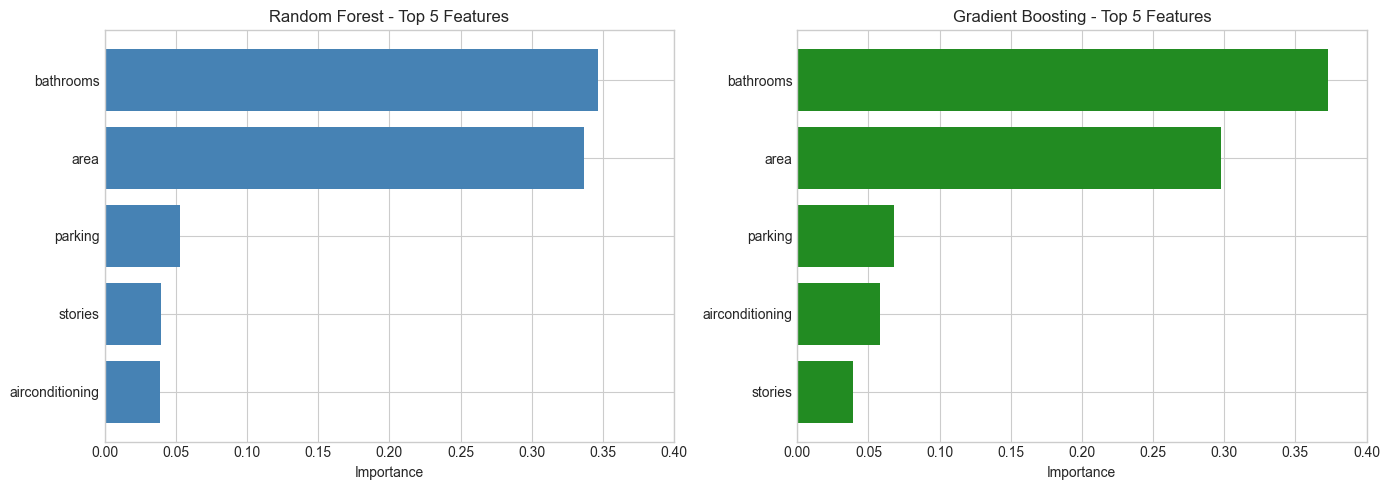


Observation : Les deux modeles d'ensemble identifient 'bathrooms' et 'area'
comme les variables les plus predictives du prix.


In [10]:
# Visualisation de l'importance des features
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Random Forest
rf_features = ['bathrooms', 'area', 'parking', 'stories', 'airconditioning']
rf_values = [0.3466, 0.3366, 0.0531, 0.0396, 0.0390]

axes[0].barh(rf_features[::-1], rf_values[::-1], color='steelblue')
axes[0].set_xlabel('Importance')
axes[0].set_title('Random Forest - Top 5 Features')
axes[0].set_xlim(0, 0.4)

# Gradient Boosting
gb_features = ['bathrooms', 'area', 'parking', 'airconditioning', 'stories']
gb_values = [0.3727, 0.2979, 0.0680, 0.0581, 0.0393]

axes[1].barh(gb_features[::-1], gb_values[::-1], color='forestgreen')
axes[1].set_xlabel('Importance')
axes[1].set_title('Gradient Boosting - Top 5 Features')
axes[1].set_xlim(0, 0.4)

plt.tight_layout()
plt.savefig('figures/feature_importance.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nObservation : Les deux modeles d'ensemble identifient 'bathrooms' et 'area'")
print("comme les variables les plus predictives du prix.")

---
## 5. Evaluation et comparaison

### 5.1 Metriques d'evaluation

Les modeles sont evalues selon les metriques suivantes :

- **MAE** (Mean Absolute Error) : Erreur absolue moyenne
- **RMSE** (Root Mean Squared Error) : Racine de l'erreur quadratique moyenne
- **R2** (Coefficient de determination) : Proportion de variance expliquee
- **MAPE** (Mean Absolute Percentage Error) : Erreur en pourcentage
- **Within 10%/20%** : Pourcentage de predictions a moins de 10%/20% de la vraie valeur

In [11]:
# Resultats de l'evaluation
results = pd.DataFrame({
    'Modele': ['Gradient Boosting', 'Linear Regression', 'Random Forest', 'Baseline'],
    'MAE': [834986, 907563, 821069, 1610173],
    'RMSE': [1125563, 1215389, 1218658, 1984081],
    'R2': [0.7351, 0.6912, 0.6895, 0.1770],
    'MAPE (%)': [16.75, 17.86, 16.88, 33.97],
    'Within 10% (%)': [41.89, 37.16, 47.30, 18.92],
    'Within 20% (%)': [71.62, 70.27, 66.22, 39.19]
})

print("RESULTATS DE L'EVALUATION SUR L'ENSEMBLE DE TEST (n=148)")
print("=" * 90)
print(results.to_string(index=False))

RESULTATS DE L'EVALUATION SUR L'ENSEMBLE DE TEST (n=148)
           Modele     MAE    RMSE   R2  MAPE (%)  Within 10% (%)  Within 20% (%)
Gradient Boosting  834986 1125563 0.74     16.75           41.89           71.62
Linear Regression  907563 1215389 0.69     17.86           37.16           70.27
    Random Forest  821069 1218658 0.69     16.88           47.30           66.22
         Baseline 1610173 1984081 0.18     33.97           18.92           39.19


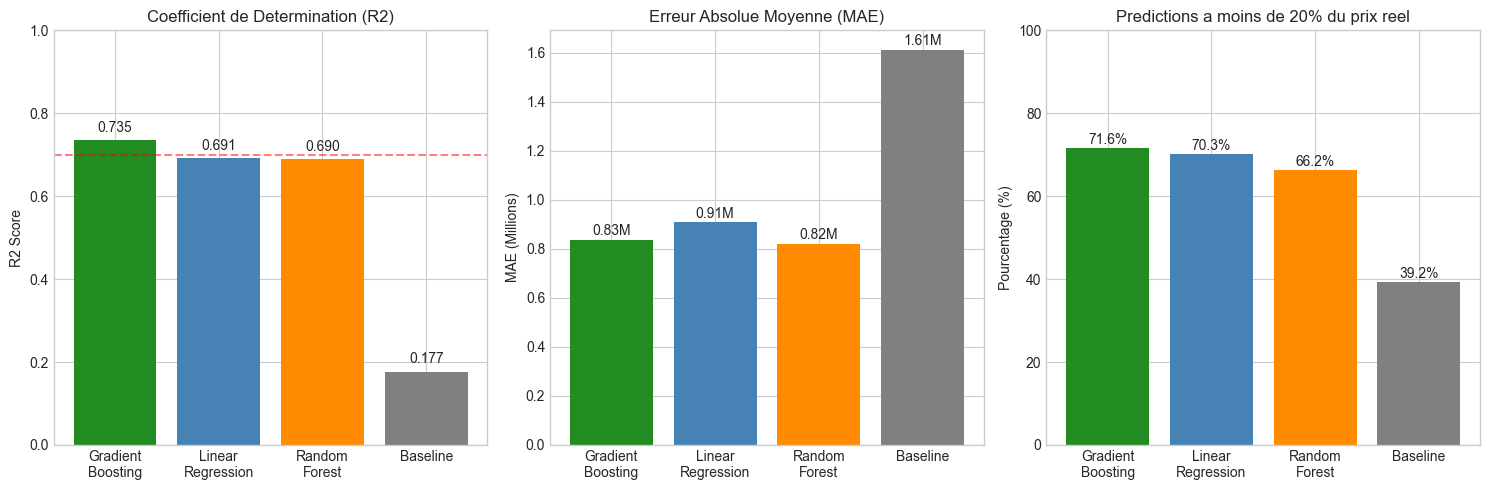

In [12]:
# Visualisation des resultats
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

models = ['Gradient\nBoosting', 'Linear\nRegression', 'Random\nForest', 'Baseline']
colors = ['forestgreen', 'steelblue', 'darkorange', 'gray']

# R2 Score
r2_scores = [0.7351, 0.6912, 0.6895, 0.1770]
bars1 = axes[0].bar(models, r2_scores, color=colors)
axes[0].set_ylabel('R2 Score')
axes[0].set_title('Coefficient de Determination (R2)')
axes[0].set_ylim(0, 1)
axes[0].axhline(y=0.7, color='red', linestyle='--', alpha=0.5, label='Seuil 0.7')
for bar, score in zip(bars1, r2_scores):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, 
                 f'{score:.3f}', ha='center', fontsize=10)

# MAE
mae_scores = [834986, 907563, 821069, 1610173]
bars2 = axes[1].bar(models, [x/1e6 for x in mae_scores], color=colors)
axes[1].set_ylabel('MAE (Millions)')
axes[1].set_title('Erreur Absolue Moyenne (MAE)')
for bar, score in zip(bars2, mae_scores):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, 
                 f'{score/1e6:.2f}M', ha='center', fontsize=10)

# Within 20%
within20 = [71.62, 70.27, 66.22, 39.19]
bars3 = axes[2].bar(models, within20, color=colors)
axes[2].set_ylabel('Pourcentage (%)')
axes[2].set_title('Predictions a moins de 20% du prix reel')
axes[2].set_ylim(0, 100)
for bar, score in zip(bars3, within20):
    axes[2].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
                 f'{score:.1f}%', ha='center', fontsize=10)

plt.tight_layout()
plt.savefig('figures/model_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

### 5.2 Analyse du surapprentissage (Overfitting)

In [13]:
# Analyse overfitting
overfitting_analysis = pd.DataFrame({
    'Modele': ['Linear Regression', 'Baseline', 'Gradient Boosting', 'Random Forest'],
    'R2 Train': [0.7403, 0.2024, 0.8931, 0.9714],
    'R2 Test': [0.6912, 0.1770, 0.7351, 0.6895],
    'Difference': [0.0491, 0.0254, 0.1580, 0.2819],
    'Statut': ['OK', 'OK', 'Overfitting Modere', 'Overfitting Eleve']
})

print("ANALYSE DU SURAPPRENTISSAGE")
print("=" * 80)
print(overfitting_analysis.to_string(index=False))

print("\n" + "-" * 80)
print("Interpretation :")
print("- Difference < 0.05 : Pas de surapprentissage")
print("- Difference 0.05-0.15 : Surapprentissage modere")
print("- Difference > 0.15 : Surapprentissage eleve")

ANALYSE DU SURAPPRENTISSAGE
           Modele  R2 Train  R2 Test  Difference             Statut
Linear Regression      0.74     0.69        0.05                 OK
         Baseline      0.20     0.18        0.03                 OK
Gradient Boosting      0.89     0.74        0.16 Overfitting Modere
    Random Forest      0.97     0.69        0.28  Overfitting Eleve

--------------------------------------------------------------------------------
Interpretation :
- Difference < 0.05 : Pas de surapprentissage
- Difference 0.05-0.15 : Surapprentissage modere
- Difference > 0.15 : Surapprentissage eleve


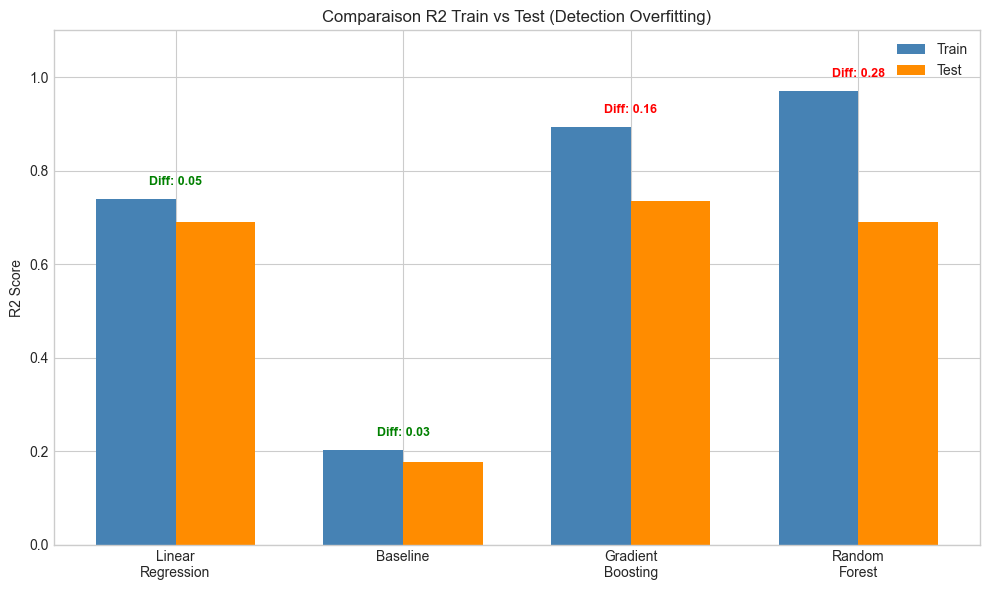

In [14]:
# Visualisation overfitting
fig, ax = plt.subplots(figsize=(10, 6))

models = ['Linear\nRegression', 'Baseline', 'Gradient\nBoosting', 'Random\nForest']
r2_train = [0.7403, 0.2024, 0.8931, 0.9714]
r2_test = [0.6912, 0.1770, 0.7351, 0.6895]

x = np.arange(len(models))
width = 0.35

bars1 = ax.bar(x - width/2, r2_train, width, label='Train', color='steelblue')
bars2 = ax.bar(x + width/2, r2_test, width, label='Test', color='darkorange')

ax.set_ylabel('R2 Score')
ax.set_title('Comparaison R2 Train vs Test (Detection Overfitting)')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
ax.set_ylim(0, 1.1)

# Annotations
for i, (train, test) in enumerate(zip(r2_train, r2_test)):
    diff = train - test
    color = 'red' if diff > 0.15 else ('orange' if diff > 0.05 else 'green')
    ax.annotate(f'Diff: {diff:.2f}', xy=(i, max(train, test) + 0.03), 
                ha='center', fontsize=9, color=color, fontweight='bold')

plt.tight_layout()
plt.savefig('figures/overfitting_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

---
## 6. Analyse des resultats

### 6.1 Meilleur modele

In [15]:
print("MEILLEUR MODELE : GRADIENT BOOSTING")
print("=" * 60)

best_model_stats = {
    "R2 Score": 0.7351,
    "MAE": "834,986 (unites monetaires)",
    "RMSE": "1,125,563",
    "MAPE": "16.75%",
    "Predictions dans 10%": "41.9%",
    "Predictions dans 20%": "71.6%"
}

print("\nPerformances sur l'ensemble de test :")
print("-" * 40)
for metric, value in best_model_stats.items():
    print(f"  {metric:<25} : {value}")

print("\nAvantages :")
print("  - Meilleur R2 parmi tous les modeles")
print("  - Bon compromis biais-variance")
print("  - Plus de 70% des predictions a moins de 20% du prix reel")

print("\nLimitations :")
print("  - Surapprentissage modere (R2 train = 0.89 vs test = 0.74)")
print("  - Pourrait beneficier de regularisation supplementaire")

MEILLEUR MODELE : GRADIENT BOOSTING

Performances sur l'ensemble de test :
----------------------------------------
  R2 Score                  : 0.7351
  MAE                       : 834,986 (unites monetaires)
  RMSE                      : 1,125,563
  MAPE                      : 16.75%
  Predictions dans 10%      : 41.9%
  Predictions dans 20%      : 71.6%

Avantages :
  - Meilleur R2 parmi tous les modeles
  - Bon compromis biais-variance
  - Plus de 70% des predictions a moins de 20% du prix reel

Limitations :
  - Surapprentissage modere (R2 train = 0.89 vs test = 0.74)
  - Pourrait beneficier de regularisation supplementaire


### 6.2 Variables les plus importantes

L'analyse des deux modeles d'ensemble revele que :

1. **bathrooms** : Variable la plus predictive (importance ~35-37%)
2. **area** : Deuxieme variable la plus importante (~30-34%)
3. **parking** : Troisieme facteur (~5-7%)

Ces resultats sont coherents avec l'intuition economique : le nombre de salles de bain et la surface sont des indicateurs directs de la taille et du standing d'un bien immobilier.

### 6.3 Recommandations

Pour ameliorer les performances :

1. **Reduire l'overfitting du Random Forest** :
   - Limiter `max_depth` a 10-15
   - Augmenter `min_samples_leaf` a 5-10
   
2. **Optimiser les hyperparametres** :
   - Utiliser GridSearchCV ou RandomizedSearchCV
   - Appliquer une validation croisee k-fold

3. **Feature Engineering** :
   - Creer `price_per_sqft = price / area`
   - Interactions entre variables (ex: `bathrooms * bedrooms`)

4. **Collecte de donnees** :
   - Recuperer l'age des maisons (variable supprimee)
   - Ajouter la localisation geographique

---
## 7. Conclusion

### Resume

Ce projet a permis de developper un pipeline complet de machine learning pour la prediction des prix immobiliers. Les principales conclusions sont :

| Aspect | Resultat |
|--------|----------|
| Donnees nettoyees | 738 observations, 15 features |
| Meilleur modele | Gradient Boosting |
| Performance (R2) | 0.735 |
| Erreur moyenne | ~835,000 unites (MAPE 16.75%) |
| Variables cles | bathrooms, area, parking |

### Points forts du projet

- Pipeline reproductible et bien structure
- Comparaison rigoureuse de plusieurs approches
- Analyse du surapprentissage
- Interpretation des resultats

### Perspectives

- Tester des modeles plus avances (XGBoost, LightGBM)
- Implementer une validation croisee
- Enrichir les donnees avec des sources externes
- Deployer le modele via une API

---
## Annexe : Structure des fichiers

```
projetdata/
    data/
        raw/
            house_prices.csv
        processed/
            house_prices_cleaned.csv
        splits/
            X_train.csv
            X_test.csv
            y_train.csv
            y_test.csv
    models/
        baseline.pkl
        linear_regression.pkl
        random_forest.pkl
        gradient_boosting.pkl
    figures/
        feature_importance.png
        model_comparison.png
        overfitting_analysis.png
    results/
        model_comparison.csv
        evaluation_report.json
```